<a href="https://colab.research.google.com/github/yannidd/analog-electronics-nn/blob/master/python/notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

# Simple MLP trained on the XOR problem

In [2]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_shape=(2,)))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer=SGD(lr=0.1),
              loss='mse',
              metrics=['accuracy'])

# model.summary()

W0730 23:09:36.300087 140543723829120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Truth table for Q = A XOR B:  

|A|B|Q|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [0]:
x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([1, -1, -1, 1])

model.fit(x, y, batch_size=4, epochs=500, verbose=1)

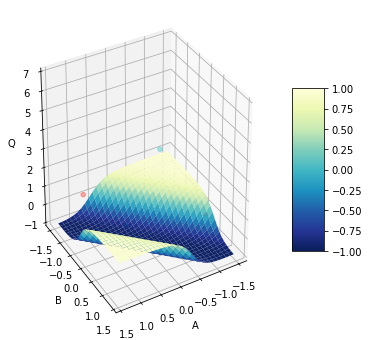

In [4]:
a = b = np.arange(-1.5, 1.5, 0.1)
A, B = np.meshgrid(a, b)
Q = np.array(np.split(model.predict(np.array(list(zip(A.flatten(), B.flatten())))).flatten(), len(a)))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[::3, 0], x[::3, 1], [2, 2], c='c')
ax.scatter3D(x[1:3, 0], x[1:3, 1], y[1:3] + 2, c='r')
surf = ax.plot_surface(A, B, Q, cmap='YlGnBu_r', vmin=-1, vmax=1)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Q')
ax.set_zlim(-1, 7)
ax.view_init(30, 60)
plt.colorbar(surf, shrink=0.5, aspect=5)